In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_4932/3123815056.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  proximity_matrix[i, j] = np.abs(data[i] - data[j])


[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]

Proximity Matrix at Iteration 0:
      P0    P1    P2    P3    P4    P5
P0   0.0   4.0   7.0   9.0  24.0  25.0
P1   4.0   0.0   3.0   5.0  20.0  21.0
P2   7.0   3.0   0.0   2.0  17.0  18.0
P3   9.0   5.0   2.0   0.0  15.0  16.0
P4  24.0  20.0  17.0  15.0   0.0   1.0
P5  25.0  21.0  18.0  16.0   1.0   0.0

Proximity Matrix at Iteration 1:
      P0    P1    P2    P3    P4
P0   0.0   4.0   7.0   9.0  24.0
P1   4.0   0.0   3.0   5.0  20.0
P2   7.0   3.0   0.0   2.0  17.0
P3   9.0   5.0   2.0   0.0  15.0
P4  24.0  20.0  17.0  15.0   0.0

Proximity Matrix at Iteration 2:
      P0    P1    P2    P3
P0   0.0   4.0   7.0  24.0
P1   4.0   0.0   3.0  20.0
P2   7.0   3.0   0.0  15.0
P3  24.0  20.0  15.0   0.0

Proximity Matrix at Iteration 3:
      P0    P1    P2
P0   0.0   4.0  24.0
P1   4.0   0.0  15.0
P2  24.0  15.0   0.0

Proximity 

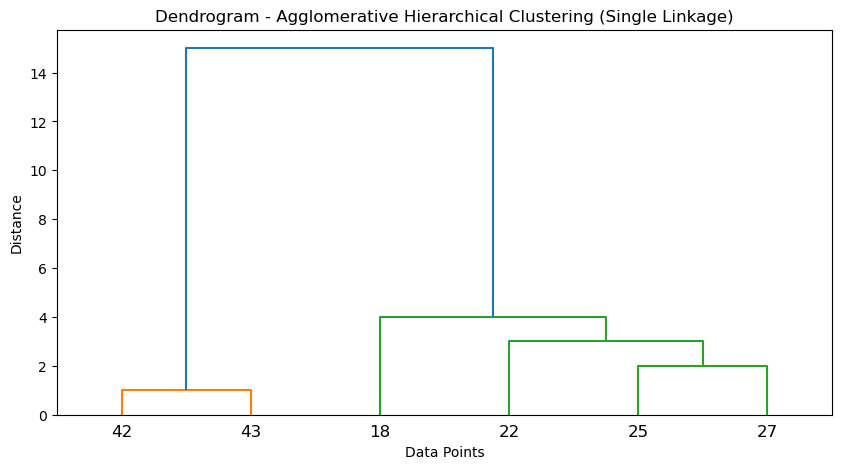

In [3]:
data = np.array([18, 22, 25, 27, 42, 43]).reshape(-1, 1)

n = len(data)
proximity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        proximity_matrix[i, j] = np.abs(data[i] - data[j])
        
print(proximity_matrix)

def print_proximity_matrix(matrix, iteration):
    print(f"\nProximity Matrix at Iteration {iteration}:")
    matrix[np.isinf(matrix)] = 0 
    df = pd.DataFrame(matrix, columns=[f"P{i}" for i in range(len(matrix))], 
                      index=[f"P{i}" for i in range(len(matrix))])
    print(df)


clusters = [[i] for i in range(n)] 

iteration = 0
print_proximity_matrix(proximity_matrix, iteration)

while len(clusters) > 1:
    min_dist = float('inf')
    to_merge = (None, None)
    
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dist = np.min([np.abs(data[p1] - data[p2]) 
                           for p1 in clusters[i] for p2 in clusters[j]])
            if dist < min_dist:
                min_dist = dist
                to_merge = (i, j)
    
   
    i, j = to_merge
    clusters[i].extend(clusters[j])
    del clusters[j]
    
    new_matrix = np.full((len(clusters), len(clusters)), np.inf)
    for x in range(len(clusters)):
        for y in range(x + 1, len(clusters)):
            new_matrix[x, y] = new_matrix[y, x] = np.min([
                np.abs(data[p1] - data[p2])
                for p1 in clusters[x] for p2 in clusters[y]
            ])
    
    iteration += 1
    print_proximity_matrix(new_matrix, iteration)
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(data, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=[str(x) for x in data.flatten()])
plt.title('Dendrogram - Agglomerative Hierarchical Clustering (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [4]:
#question 2
import numpy as np
points = np.array([
    [1, 1],  
    [3, 2],  
    [9, 1],  
    [3, 7],  
    [7, 2], 
    [9, 7],  
    [4, 8],  
    [8, 3],  
    [1, 4]   
])

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def create_distance_matrix(points):
    n = len(points)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            distance = euclidean_distance(points[i], points[j])
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    return distance_matrix

def hierarchical_clustering(points):
    distance_matrix = create_distance_matrix(points)
    
    clusters = [[i] for i in range(len(points))]  
    cluster_count = len(clusters)

    print(f"Initial clusters: {clusters}")
    while cluster_count > 1:
        
        min_distance = float('inf')
        to_merge = (0, 0)

        for i in range(len(distance_matrix)):
            for j in range(i + 1, len(distance_matrix)):
                if distance_matrix[i][j] < min_distance:
                    min_distance = distance_matrix[i][j]
                    to_merge = (i, j)

       
        cluster1, cluster2 = to_merge
        new_cluster = clusters[cluster1] + clusters[cluster2]
        
        
        clusters.append(new_cluster) 
        clusters.pop(max(cluster1, cluster2))  
        clusters.pop(min(cluster1, cluster2))  

        
        new_distances = []
        for i in range(len(distance_matrix)):
            if i != cluster1 and i != cluster2:
                distance = min(distance_matrix[cluster1][i], distance_matrix[cluster2][i])
                new_distances.append(distance)

        new_distance_matrix_size = len(clusters)  
        new_distance_matrix = np.zeros((new_distance_matrix_size, new_distance_matrix_size))

        for i in range(new_distance_matrix_size):
            for j in range(new_distance_matrix_size):
                if i == j:
                    continue
                if i < len(clusters) - 1 and j < len(clusters) - 1:  
                    new_distance_matrix[i][j] = distance_matrix[i][j]
                elif i == len(clusters) - 1:  
                    new_distance_matrix[i][j] = new_distances[j if j < len(clusters) - 1 else 0]

        distance_matrix = new_distance_matrix 
        cluster_count -= 1

        print(f"Merged clusters: {clusters}")

    return clusters

final_clusters = hierarchical_clustering(points)
print(f"Final clusters: {final_clusters}")


Initial clusters: [[0], [1], [2], [3], [4], [5], [6], [7], [8]]
Merged clusters: [[0], [1], [2], [4], [5], [7], [8], [3, 6]]
Merged clusters: [[1], [2], [4], [5], [7], [8], [0, 3, 6]]
Merged clusters: [[2], [4], [5], [7], [8], [1, 0, 3, 6]]
Merged clusters: [[4], [5], [7], [8], [2, 1, 0, 3, 6]]
Merged clusters: [[5], [7], [8], [4, 2, 1, 0, 3, 6]]
Merged clusters: [[7], [8], [5, 4, 2, 1, 0, 3, 6]]
Merged clusters: [[8], [7, 5, 4, 2, 1, 0, 3, 6]]
Merged clusters: [[8, 7, 5, 4, 2, 1, 0, 3, 6]]
Final clusters: [[8, 7, 5, 4, 2, 1, 0, 3, 6]]


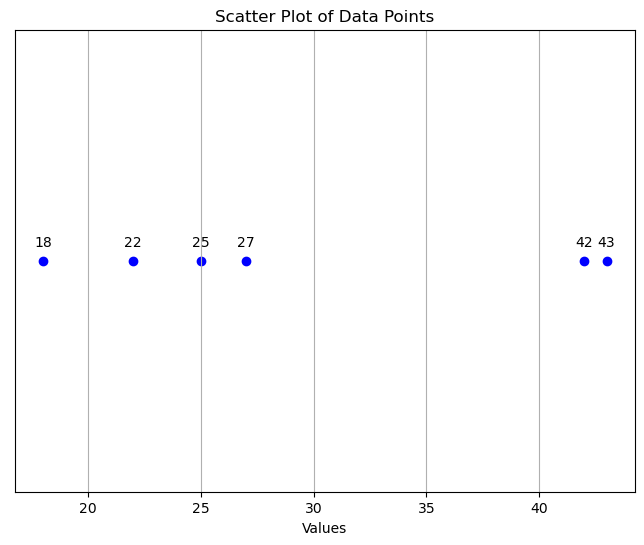

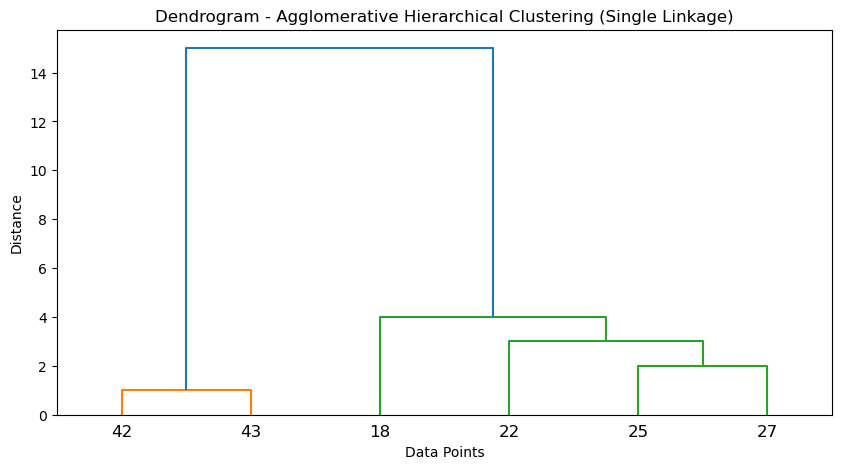

Euclidean Distance Matrix:
[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]

Manhattan Distance Matrix:
[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]

Minkowski Distance Matrix:
[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data = np.array([18, 22, 25, 27, 42, 43]).reshape(-1, 1)

def plot_scatter(data):
    plt.figure(figsize=(8, 6))
    plt.scatter(data, np.zeros_like(data), marker='o', color='blue')
    for i, txt in enumerate([f'{int(data[i][0])}' for i in range(len(data))]):
        plt.annotate(txt, (data[i][0], 0), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.title('Scatter Plot of Data Points')
    plt.xlabel('Values')
    plt.yticks([])
    plt.grid()
    plt.show()

linkage_matrix = linkage(data, method='single')

def plot_dendrogram(linkage_matrix):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=[str(x[0]) for x in data])
    plt.title('Dendrogram - Agglomerative Hierarchical Clustering (Single Linkage)')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

plot_scatter(data)
plot_dendrogram(linkage_matrix)


def create_proximity_matrix(data):
    n = len(data)
    euclidean = np.zeros((n, n))
    manhattan = np.zeros((n, n))
    minkowski = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
            euclidean_distance_value = np.sqrt(np.sum((data[i] - data[j]) ** 2))
            manhattan_distance_value = np.sum(np.abs(data[i] - data[j]))
            minkowski_distance_value = np.power(np.sum(np.abs(data[i] - data[j]) ** 3), 1/3)

            euclidean[i][j] = euclidean_distance_value
            euclidean[j][i] = euclidean_distance_value

            manhattan[i][j] = manhattan_distance_value
            manhattan[j][i] = manhattan_distance_value

            minkowski[i][j] = minkowski_distance_value
            minkowski[j][i] = minkowski_distance_value

    return euclidean, manhattan, minkowski

euclidean_matrix, manhattan_matrix, minkowski_matrix = create_proximity_matrix(data)

print("Euclidean Distance Matrix:")
print(euclidean_matrix)

print("\nManhattan Distance Matrix:")
print(manhattan_matrix)

print("\nMinkowski Distance Matrix:")
print(minkowski_matrix)
